# **Best Pittsburgh neighborhood**
### group members: Owen Latt, Alex Mueller, Jermain Howard



## Metric: Best neighborhood for kids
We measured this by 
1. Safety 
2. Fun
3. Education

# Saftey
### By: Jermaine
We found the safest neighborhood in pittsburgh by using the arrest data csv file\
[Pittsburgh Arrest Data](https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f)

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
dataset = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")

print(dataset.columns)

Index(['_id', 'PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME',
       'ARRESTLOCATION', 'OFFENSES', 'INCIDENTLOCATION',
       'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')


### First we had to create a datafram and assign it the infromation in the csv file using pandas read_csv funtion

<Axes: xlabel='INCIDENTNEIGHBORHOOD'>

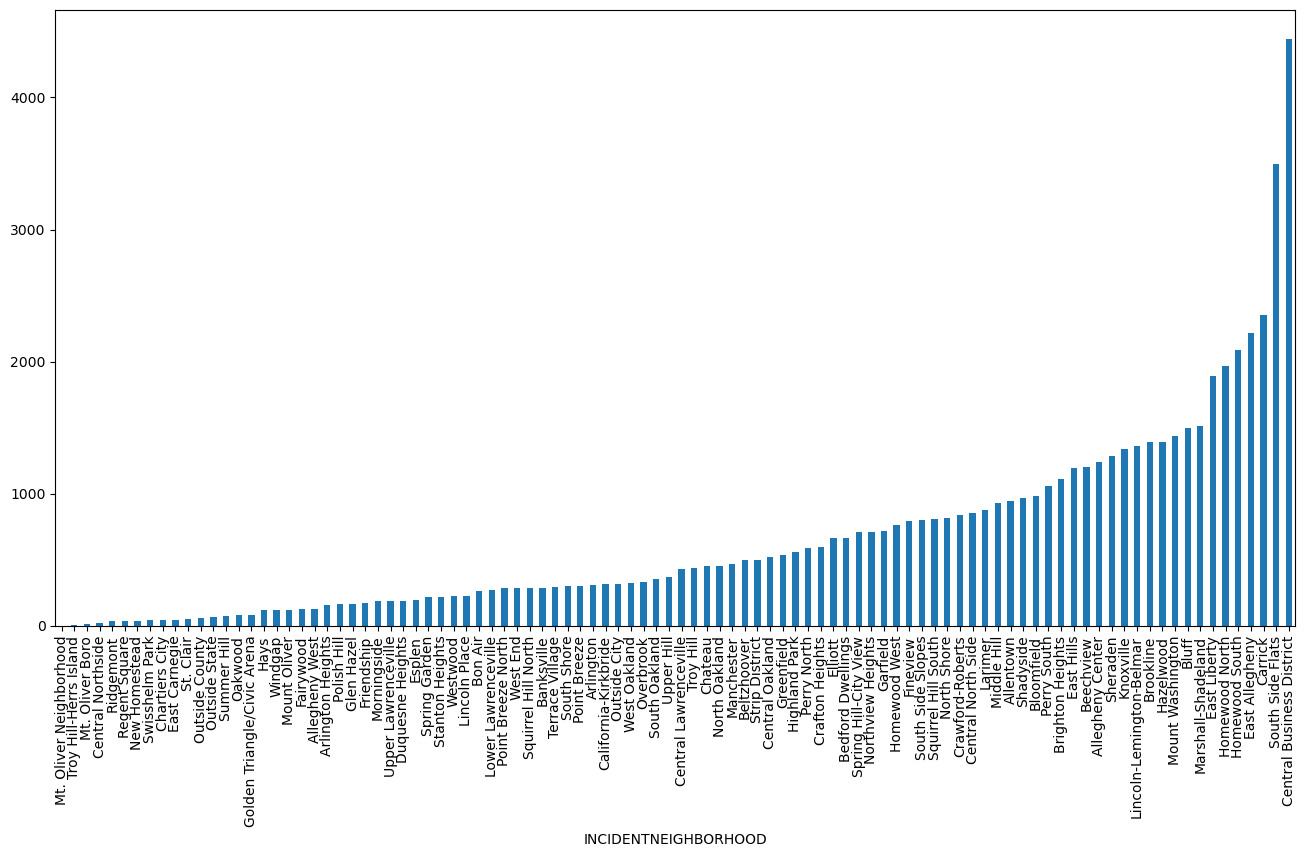

In [331]:
neighborhood_counts = dataset["INCIDENTNEIGHBORHOOD"].value_counts()
neighbordhood_counts_sorted = neighborhood_counts.sort_values(ascending = True)
neighbordhood_counts_sorted.plot(kind = 'bar', x = 'Neighborhood', y = 'Crime Count', figsize = (16,8))

### Then we orgranized the data by sorting with the column named incidentneighborhood which is the neighborhood attribute in the csv file, then we sorted it by ascending value so the neighborhoods with the least occurences show up first

In [333]:
print(neighbordhood_counts_sorted)

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood         2
Troy Hill-Herrs Island          6
Mt. Oliver Boro                18
Central Northside              23
Ridgemont                      37
                             ... 
Homewood South               2090
East Allegheny               2217
Carrick                      2352
South Side Flats             3497
Central Business District    4440
Name: count, Length: 98, dtype: int64


# Fun
### By: Alex
We found the most fun neighborhood in Pittsburgh by using the data that showed the location of each park in Pittsburgh\
[Pittsburgh Park Data](https://data.wprdc.org/dataset/parks/resource/fa329e3d-89ff-4708-8ddf-81bfedcad11d)

In [335]:
parks = pd.read_csv("parks.csv")
ppn = parks.groupby("neighborhood").size()
ppn = ppn.reset_index(name="Park Count")
print(ppn)
ppn_sorted = ppn.sort_values(by='Park Count', ascending=False)
ppn_sorted.head(15)

           neighborhood  Park Count
0      Allegheny Center           2
1             Allentown           2
2             Arlington           1
3            Banksville           2
4     Bedford Dwellings           1
..                  ...         ...
68  Upper Lawrenceville           3
69             West End           2
70         West Oakland           1
71             Westwood           3
72              Windgap           1

[73 rows x 2 columns]


,neighborhood,Park Count
22,East Liberty,12
13,Central Business District,10
5,Beechview,8
50,Point Breeze,7
57,South Side Slopes,7
61,Squirrel Hill South,6
30,Hazelwood,6
54,Sheraden,6
43,Mount Washington,6
56,South Side Flats,6


### Again we imported the csv file by assigning a variable the csv information, then we grouped by the value neighborhood and had it count each occurence, Then we sorted the values by Descending order that way the neighborhood with the most parks would be on top.

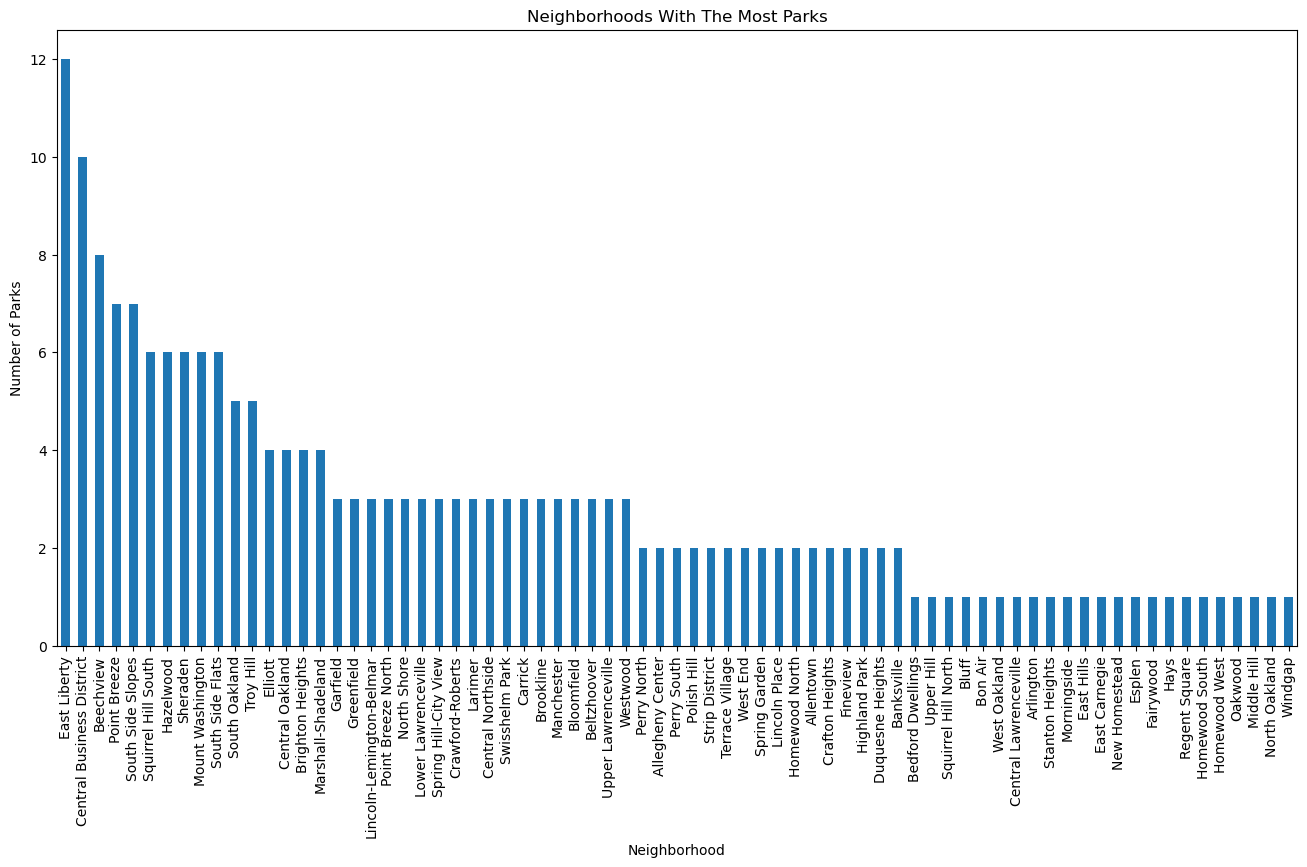

In [337]:

ppn_sorted.plot(kind='bar', x ='neighborhood', y='Park Count', legend=False, figsize = (16,8))
plt.title("Neighborhoods With The Most Parks")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Parks")
plt.show()

### Then we used the matplotlib tool to plot the information in our dataset which was already sorted so now we can see which neighborhood has the most parks

# Public Schools/Education
### By: Owen
We found the best neighborhood in Pittsburgh by using a CSV file containing the list of public schools in Pittsburgh and sorted it to find the neighborhood with the most Public schools\
[Pittsburgh School Data](https://data.wprdc.org/dataset/pittsburgh-public-school-locations)

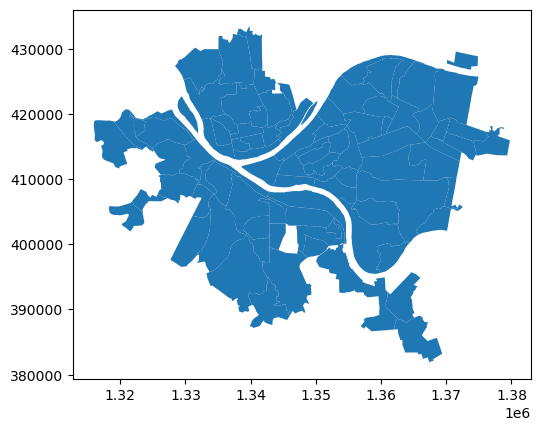

In [340]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()
schools_df = pd.read_csv('schools.csv')

### First We used a shape file of the neighborhoods in Pittsburgh and geopandas to plot the shape file to get a map of Pittsburgh

In [343]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(schools_df['longitude'], schools_df['latitude'])]
schools_gdf = gpd.GeoDataFrame(schools_df, geometry=geometry, crs='EPSG:4326')

# Check CRS
schools_gdf = schools_gdf.to_crs(neighborhoods.crs)
print(neighborhoods.crs)
print(schools_gdf.crs)

EPSG:2272
EPSG:2272


### Then we used the help of another library called shapley which is a helpful tool for creating points on a geometric graph, then we had to make a geodata frame out of the schools csv file by using Longitude and Latitude. Then we also had to cofirm that the crs used in the Pittsburgh map and the School geo data frame was the same that way we could overlap the data. The CRS is important to make sure they are the same, it stands for Cordinate reference system, if they are not the same and we combine the data then it wouldnt be accurate

In [348]:
schools_with_neighborhoods = gpd.sjoin(schools_gdf, neighborhoods, how="left", predicate='within')
school_counts = schools_with_neighborhoods.groupby('hood').size().reset_index(name='school_count')

In [349]:
neighborhoods = neighborhoods.merge(school_counts, left_on='hood', right_on='hood', how='left')
neighborhoods['school_count'] = neighborhoods['school_count'].fillna(0)  # Fill NaN with 0

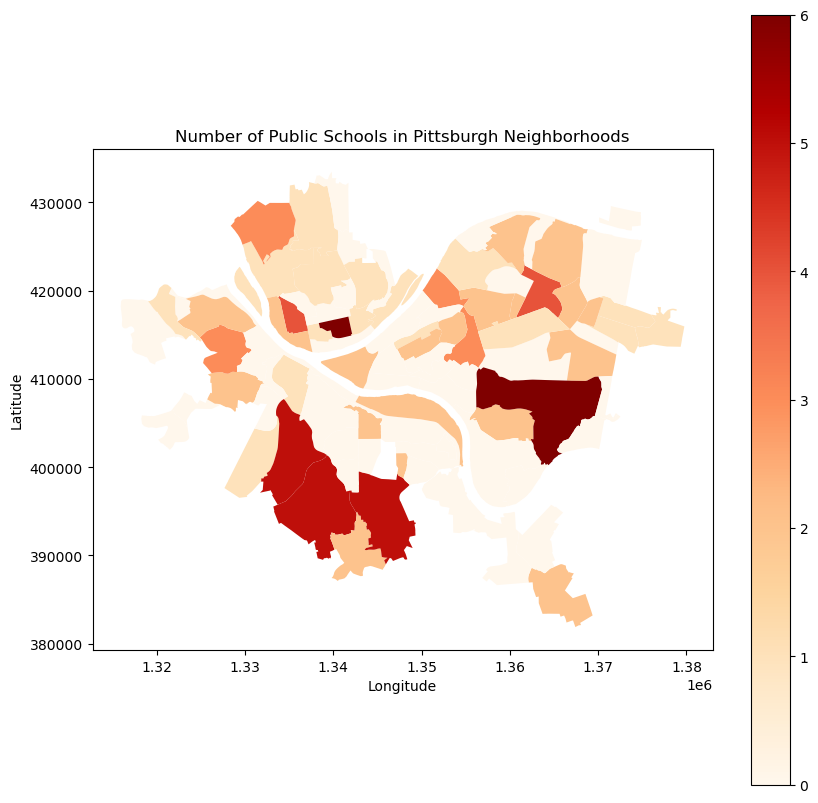

In [352]:
neighborhoods.plot(column='school_count', cmap='OrRd', legend=True, figsize=(10, 10))
plt.title('Number of Public Schools in Pittsburgh Neighborhoods')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Then we combined the Geodata frame of the schools with the original Pittsburgh map and then once combined we created a heat map to locate which neighborhood in pittsburgh had the most public schools

In [357]:
school_counts_sorted = school_counts.sort_values(by='school_count', ascending=False)
print(school_counts_sorted)

                         hood  school_count
0            Allegheny Center             6
40        Squirrel Hill South             6
5                   Beechview             5
8                   Brookline             5
9                     Carrick             5
27                 Manchester             4
17               East Liberty             4
26        Lower Lawrenceville             3
7            Brighton Heights             3
31              North Oakland             3
13            Crafton Heights             3
32                  Overbrook             2
29                Middle Hill             2
30                 Mt. Oliver             2
37                   Sheraden             2
35               Point Breeze             2
24                    Larimer             2
38           South Side Flats             2
41            Stanton Heights             2
43                 Upper Hill             2
44                   Westwood             2
25              Lincoln Place   

### This is the official data that has each neighborhood and the number of public schools although it only contains 46 counts

In [361]:
total_neighborhoods = neighborhoods['hood'].unique()
counted_neighborhoods = school_counts['hood'].unique()
missing_neighborhoods = set(total_neighborhoods) - set(counted_neighborhoods)
print("Neighborhoods without schools:", missing_neighborhoods)
print("Number of neighborhoods without schools:", len(missing_neighborhoods))

Neighborhoods without schools: {'Hays', 'Knoxville', 'Squirrel Hill North', 'West End', 'Oakwood', 'Terrace Village', 'California-Kirkbride', 'Spring Garden', 'Polish Hill', 'Esplen', 'Bluff', 'Elliott', 'Fairywood', 'North Shore', 'Lincoln-Lemington-Belmar', 'Central Oakland', 'Glen Hazel', 'South Side Slopes', 'St. Clair', 'Summer Hill', 'Regent Square', 'New Homestead', 'East Carnegie', 'West Oakland', 'Arlington Heights', 'Beltzhoover', 'Central Northside', 'Ridgemont', 'Strip District', 'Bon Air', 'Mount Washington', 'Morningside', 'Crawford-Roberts', 'South Shore', 'Garfield', 'Chartiers City', 'Hazelwood', 'Swisshelm Park', 'South Oakland', 'Point Breeze North', 'Northview Heights', 'Fineview', 'Arlington', 'Upper Lawrenceville'}
Number of neighborhoods without schools: 44


### Then to confirm the data was correct we went through and found the number of Neighborhoods that didnt get included and the result was 44 therefore 44 +46 =90 which was the original number of neighborhoods confirming our data was correct

Index(['hood', 'school_count'], dtype='object')


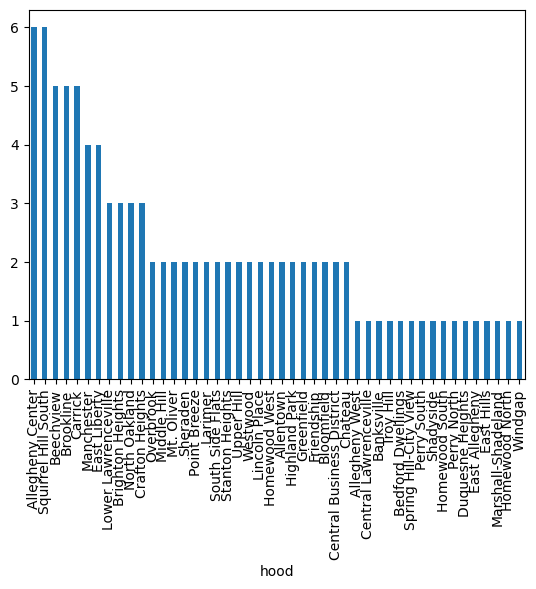

In [364]:
school_counts_sorted.plot(kind='bar',x='hood',y='school_count', legend=False)
print(school_counts_sorted.columns)

### Then we printed a final bargraph of all of the neighborhoods in order

# Firguring out the best neighborhood by combinding all of the data

In [368]:
school_counts_sorted=school_counts_sorted.reset_index(drop=True)
school_counts_sorted.head()


,hood,school_count
0,Allegheny Center,6
1,Squirrel Hill South,6
2,Beechview,5
3,Brookline,5
4,Carrick,5


In [370]:
ppn_sorted=ppn_sorted.reset_index(drop=True)
ppn_sorted.head()

,neighborhood,Park Count
0,East Liberty,12
1,Central Business District,10
2,Beechview,8
3,Point Breeze,7
4,South Side Slopes,7


In [372]:
arrest_data= dataset["INCIDENTNEIGHBORHOOD"].value_counts()

In [374]:
arrest_df= arrest_data.reset_index()
arrest_df.columns = ["Neighborhood", "Count"]
arrest_df=arrest_df.sort_values("Count", ascending=True)
arrest_df= arrest_df.reset_index(drop=True)
arrest_df.head()

,Neighborhood,Count
0,Mt. Oliver Neighborhood,2
1,Troy Hill-Herrs Island,6
2,Mt. Oliver Boro,18
3,Central Northside,23
4,Ridgemont,37


In [376]:
school_counts_sorted['points'] = school_counts_sorted.index + 1 

In [378]:
ppn_sorted['points'] = ppn_sorted.index + 1

In [380]:
arrest_df['points'] = arrest_df.index + 1

In [382]:
print(arrest_df.columns)

Index(['Neighborhood', 'Count', 'points'], dtype='object')


In [384]:
print(ppn_sorted.columns)

Index(['neighborhood', 'Park Count', 'points'], dtype='object')


In [386]:
print(school_counts_sorted.columns)

Index(['hood', 'school_count', 'points'], dtype='object')


In [388]:
school_counts_sorted.rename(columns={'hood': 'Neighborhood'}, inplace=True)

In [390]:
print(school_counts_sorted.columns)

Index(['Neighborhood', 'school_count', 'points'], dtype='object')


In [392]:
ppn_sorted.rename(columns={'neighborhood': 'Neighborhood'}, inplace=True)

In [394]:
print(ppn_sorted.columns)

Index(['Neighborhood', 'Park Count', 'points'], dtype='object')


### Renaming all of the columns in the data set so they are all the same

In [427]:
combined_df = pd.merge(school_counts_sorted[['Neighborhood', 'points']], 
                       ppn_sorted[['Neighborhood', 'points']], 
                       on='Neighborhood', how='outer', suffixes=('_school', '_park'))

In [429]:
combined_df = pd.merge(combined_df, arrest_df[['Neighborhood', 'points']], 
                       on='Neighborhood', how='outer')
combined_df.rename(columns={'points': 'points_arrest'}, inplace=True)

In [431]:
print(combined_df)

           Neighborhood  points_school  points_park  points_arrest
0      Allegheny Center            1.0         36.0           83.0
1        Allegheny West           31.0          NaN           21.0
2             Allentown           24.0         45.0           76.0
3             Arlington            NaN         58.0           43.0
4     Arlington Heights            NaN          NaN           22.0
..                  ...            ...          ...            ...
94  Upper Lawrenceville            NaN         33.0           27.0
95             West End            NaN         41.0           37.0
96         West Oakland            NaN         56.0           46.0
97             Westwood           21.0         34.0           32.0
98              Windgap           46.0         73.0           18.0

[99 rows x 4 columns]


In [433]:
combined_df.dropna(inplace=True)

## We just dropped all of the neighborhoods that had NaN as one of the values since some of the data was misleading and if theres no information/ no school or parks its unfair to have it in this list

In [435]:
combined_df['total_points'] = (combined_df['points_school'] + 
                               combined_df['points_park'] + 
                               combined_df['points_arrest'])

In [437]:
combined_df = combined_df[['Neighborhood', 'total_points']]

In [439]:
print(combined_df)

                 Neighborhood  total_points
0            Allegheny Center         120.0
2                   Allentown         145.0
5                  Banksville         122.0
6           Bedford Dwellings         149.0
7                   Beechview          88.0
9                  Bloomfield         137.0
12           Brighton Heights         104.0
13                  Brookline         120.0
15                    Carrick         129.0
16  Central Business District         129.0
17      Central Lawrenceville         139.0
23            Crafton Heights         118.0
25           Duquesne Heights         118.0
28                 East Hills         185.0
29               East Liberty         100.0
38                 Greenfield         102.0
41              Highland Park         132.0
42             Homewood North         182.0
43             Homewood South         201.0
44              Homewood West         159.0
46                    Larimer         116.0
47              Lincoln Place   

In [441]:
combined_df = combined_df.sort_values(by='total_points', ascending=True)

In [443]:
combined_df.reset_index(drop=True, inplace=True)

In [445]:
print(combined_df)

                 Neighborhood  total_points
0                Point Breeze          62.0
1         Lower Lawrenceville          65.0
2         Squirrel Hill South          78.0
3                    Westwood          87.0
4                   Beechview          88.0
5                  Manchester          90.0
6                   Troy Hill          97.0
7               Lincoln Place          98.0
8                East Liberty         100.0
9                  Greenfield         102.0
10           Brighton Heights         104.0
11                   Sheraden         107.0
12            Stanton Heights         109.0
13                    Larimer         116.0
14            Crafton Heights         118.0
15           Duquesne Heights         118.0
16                  Brookline         120.0
17           Allegheny Center         120.0
18                 Upper Hill         121.0
19                 Banksville         122.0
20      Spring Hill-City View         123.0
21           South Side Flats   

### Therefore we can conclude from this data that the best neighborhood is Point Breeze, following that the next few
1. Point Breeze
2. Lower Lawrenceville
3. squirrel Hill South
4. Westwood
5. Beechview